In [1]:
# Import relevant libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
filename_1 = "FIU_Phishing_Mitre_Dataset.csv"

In [5]:
phish_data = pd.read_csv(filename_1)

clean_url = phish_data["URL"]

len_url = []

for ur in clean_url:
    len_url.append(len(ur))

phish_data['URL_length'] = pd.Series(len_url)

len_slashes = []

for ur in clean_url:
    len_slashes.append(ur.count('/') )

phish_data['URL_slashes'] = pd.Series(len_slashes)

len_dots = []

for ur in clean_url:
    len_dots.append(ur.count('.') )

phish_data['URL_dots'] = pd.Series(len_dots)

len_host = []

start = '://'
end = '/'

for ur in clean_url:
    temp = ur[ur.find(start)+2*len(start) + 2: ur.rfind(end)]
    temp = temp.replace('/','.')
    temp = temp.replace('-','.')
    len_host.append(len(temp.split('.')))

phish_data['URL_host'] = pd.Series(len_host)

num_data = phish_data[['create_age(months)', 'expiry_age(months)', 'update_age(days)', 'URL_length', 'URL_slashes', 'URL_dots', 'URL_host']].values
num_lab = phish_data["Label"].values

sscaler = StandardScaler()
num_data_scaled = sscaler.fit_transform(num_data)
num_data = num_data_scaled

create = num_data[:,0]
expiry = num_data[:,1]
update = num_data[:,2]
#len_url
#len_slashes
#len_dots
#len_host

In [6]:
expiry = np.where(expiry > -3, expiry, 0)


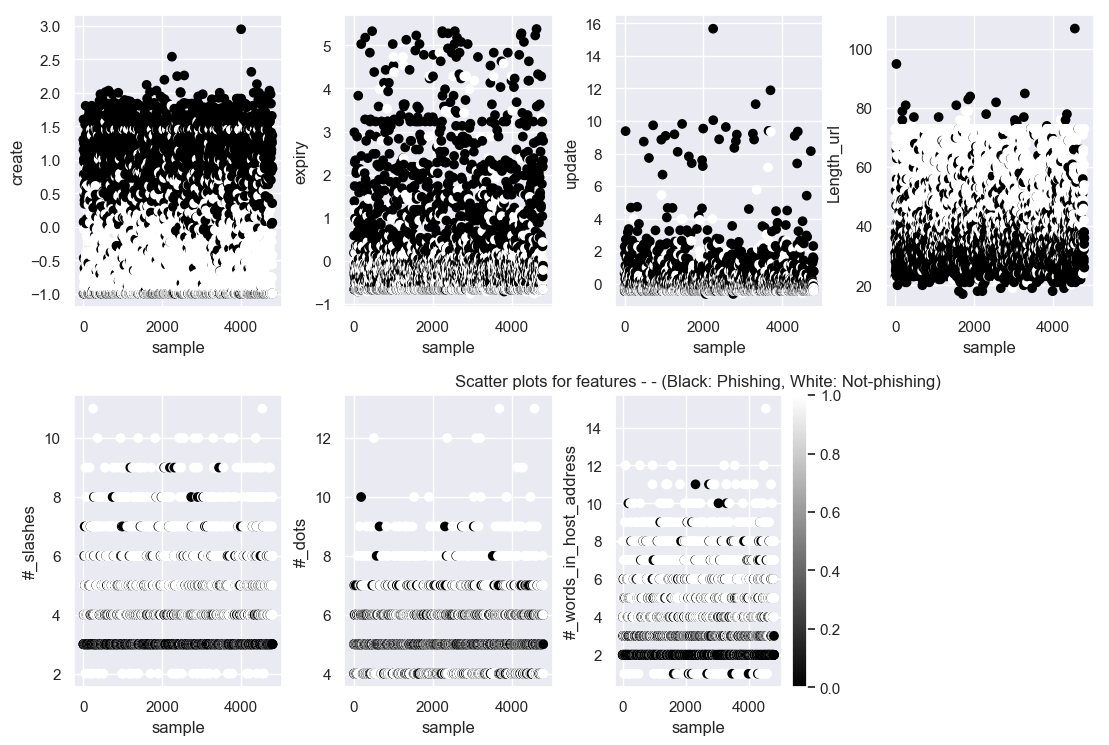

In [16]:
xval = np.arange(len(num_lab))

color_lab = []

for i in num_lab:
    color_lab.append(i)

plt.figure(figsize=(12, 8), dpi=100)

plt.subplot(2,4, 1)
plt.scatter(xval, create, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('create')
plt.grid(True)

plt.subplot(2,4, 2)
plt.scatter(xval, expiry, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('expiry')
plt.grid(True)

plt.subplot(2,4, 3)
plt.scatter(xval, update, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('update')
plt.grid(True)

plt.subplot(2,4, 4)
plt.scatter(xval, len_url, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('Length_url')
plt.grid(True)

plt.subplot(2,4, 5)
plt.scatter(xval, len_slashes, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('#_slashes')
plt.grid(True)

plt.subplot(2,4, 6)
plt.scatter(xval, len_dots, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('#_dots')
plt.grid(True)


plt.subplot(2,4, 7)
plt.scatter(xval, len_host, c = color_lab, cmap = 'gray')
plt.xlabel('sample')
plt.ylabel('#_words_in_host_address')
plt.grid(True)


#plt.title('Scatter plot for all features colored classwise')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.3)
plt.colorbar()
plt.title("Scatter plots for features - - (Black: Phishing, White: Not-phishing)")
plt.savefig('scatter_plots.png', dpi = 600)


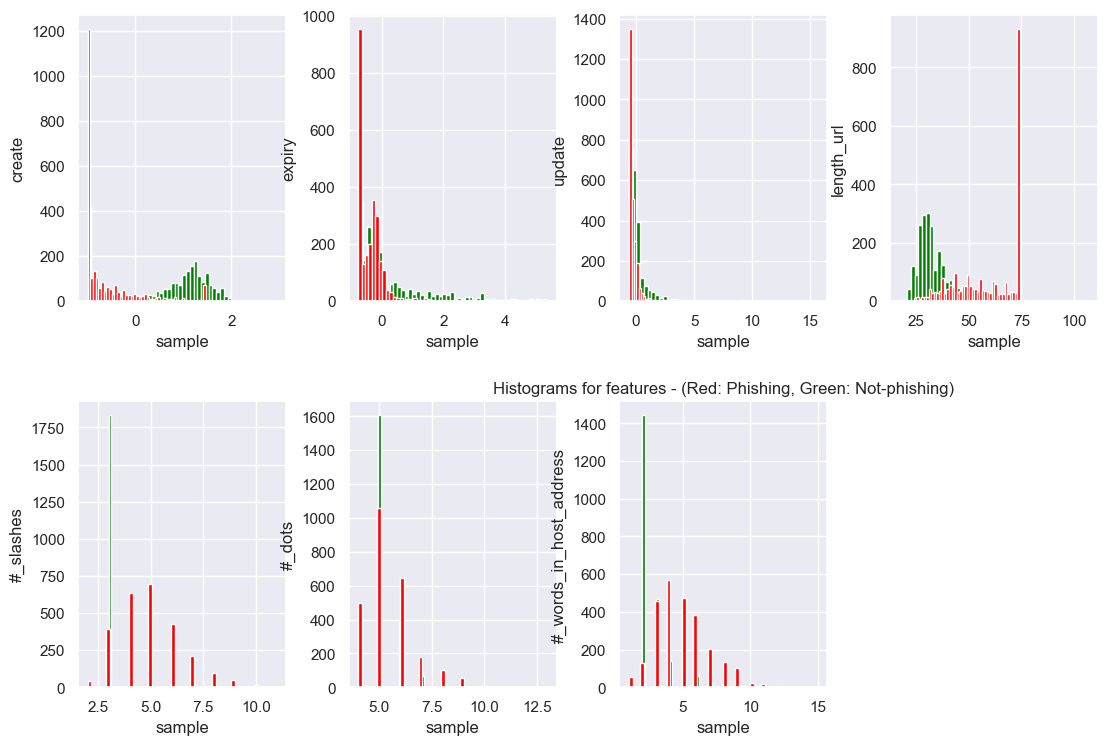

In [17]:
#Class wise distributions

len_url = np.array(len_url)
len_slashes = np.array(len_slashes)
len_dots = np.array(len_dots)
len_host = np.array(len_host)

plt.figure(figsize=(12, 8), dpi=100)

plt.subplot(2,4,1)
plt.hist(create[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(create[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('create')
plt.grid(True)

plt.subplot(2,4,2)
plt.hist(expiry[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(expiry[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('expiry')
plt.grid(True)

plt.subplot(2,4,3)
plt.hist(update[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(update[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('update')
plt.grid(True)

plt.subplot(2,4,4)
plt.hist(len_url[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(len_url[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('length_url')
plt.grid(True)

plt.subplot(2,4,5)
plt.hist(len_slashes[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(len_slashes[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('#_slashes')
plt.grid(True)

plt.subplot(2,4,6)
plt.hist(len_dots[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(len_dots[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('#_dots')
plt.grid(True)


plt.subplot(2,4,7)
plt.hist(len_host[np.where(num_lab == 0)], bins = 50, color = 'green')
plt.hist(len_host[np.where(num_lab > 0)], bins = 50, color = 'red')
plt.xlabel('sample')
plt.ylabel('#_words_in_host_address')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)
plt.title("Histograms for features - (Red: Phishing, Green: Not-phishing)")
plt.savefig('histograms.png', dpi = 600)